<a href="https://colab.research.google.com/github/LeonardoSer/Univ/blob/main/NetOpt/jupyter_notebooks/Plant%20location-gurobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uncapacitated facility location

The uncapacitated facility location problem (UFLP) calls for locating an undetermined number of facilities to minimize the sum of the fixed setup costs and the variable costs of serving the customers demand from the selected facilities. 

## Data

* A set $N =\{1, \ldots, n\}$ of potential depots
* A set $M =\{1, \ldots, m\}$ of clients
* A cost $f_j$ of opening a facility $j$
* A cost $c_{ij}$ associated with serving customer $i$ from facility $j$



In [3]:
!pip install -i https://pypi.gurobi.com gurobipy

import gurobipy as gb 
import random
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.gurobi.com
     |████████████████████████████████| 11.1MB 376kB/s 


In [4]:
random.seed(10)


Facilities = ["LAquila", 
              "Avezzano", 
              "Pescara", 
              "Teramo", 
              "Chieti", 
              "Sulmona"]

OpeningCosts = [1500, 1200, 250, 100, 200, 250]

Plants = dict(zip(Facilities, OpeningCosts))

In [5]:
import string

Clients = list(range(10))

In [6]:
Clients

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
random.seed(100)

Costs = {(i,j):random.randint(10,200) for i in Clients for j in Facilities }

In [8]:
Costs

{(0, 'Avezzano'): 127,
 (0, 'Chieti'): 190,
 (0, 'LAquila'): 47,
 (0, 'Pescara'): 126,
 (0, 'Sulmona'): 110,
 (0, 'Teramo'): 54,
 (1, 'Avezzano'): 99,
 (1, 'Chieti'): 38,
 (1, 'LAquila'): 197,
 (1, 'Pescara'): 120,
 (1, 'Sulmona'): 146,
 (1, 'Teramo'): 139,
 (2, 'Avezzano'): 30,
 (2, 'Chieti'): 77,
 (2, 'LAquila'): 41,
 (2, 'Pescara'): 198,
 (2, 'Sulmona'): 22,
 (2, 'Teramo'): 126,
 (3, 'Avezzano'): 175,
 (3, 'Chieti'): 68,
 (3, 'LAquila'): 178,
 (3, 'Pescara'): 62,
 (3, 'Sulmona'): 89,
 (3, 'Teramo'): 95,
 (4, 'Avezzano'): 55,
 (4, 'Chieti'): 98,
 (4, 'LAquila'): 62,
 (4, 'Pescara'): 46,
 (4, 'Sulmona'): 104,
 (4, 'Teramo'): 58,
 (5, 'Avezzano'): 114,
 (5, 'Chieti'): 128,
 (5, 'LAquila'): 170,
 (5, 'Pescara'): 63,
 (5, 'Sulmona'): 152,
 (5, 'Teramo'): 113,
 (6, 'Avezzano'): 106,
 (6, 'Chieti'): 173,
 (6, 'LAquila'): 80,
 (6, 'Pescara'): 51,
 (6, 'Sulmona'): 41,
 (6, 'Teramo'): 176,
 (7, 'Avezzano'): 11,
 (7, 'Chieti'): 47,
 (7, 'LAquila'): 56,
 (7, 'Pescara'): 164,
 (7, 'Sulmona'): 15

## Variables

$$
y_{j}=
\begin{cases}
1 \text{ if facility } j \text{ is open},\\
0 \text{ otherwise}
\end{cases}
$$

$$
x_{ij}=
\begin{cases}
1 \text{ if client } i \text{ is served from facility} j,\\
0 \text{ otherwise}
\end{cases}
$$

In [9]:
ufl = gb.Model('FacilityLocation')

Restricted license - for non-production use only - expires 2022-01-13


In [10]:
y = ufl.addVars (Facilities, vtype=gb.GRB.BINARY, name='y')

In [11]:
x = ufl.addVars (Clients, Facilities, vtype=gb.GRB.CONTINUOUS, name = 'x')


In [12]:
ufl.update ()

ufl.write('ufl.lp')

## Objective function

$$
\min \sum_{j=1}^n f_j y_j + \sum_{i=1}^m \sum_{j=1}^n c_{ij}x_{ij}
$$


In [13]:
Costs

{(0, 'Avezzano'): 127,
 (0, 'Chieti'): 190,
 (0, 'LAquila'): 47,
 (0, 'Pescara'): 126,
 (0, 'Sulmona'): 110,
 (0, 'Teramo'): 54,
 (1, 'Avezzano'): 99,
 (1, 'Chieti'): 38,
 (1, 'LAquila'): 197,
 (1, 'Pescara'): 120,
 (1, 'Sulmona'): 146,
 (1, 'Teramo'): 139,
 (2, 'Avezzano'): 30,
 (2, 'Chieti'): 77,
 (2, 'LAquila'): 41,
 (2, 'Pescara'): 198,
 (2, 'Sulmona'): 22,
 (2, 'Teramo'): 126,
 (3, 'Avezzano'): 175,
 (3, 'Chieti'): 68,
 (3, 'LAquila'): 178,
 (3, 'Pescara'): 62,
 (3, 'Sulmona'): 89,
 (3, 'Teramo'): 95,
 (4, 'Avezzano'): 55,
 (4, 'Chieti'): 98,
 (4, 'LAquila'): 62,
 (4, 'Pescara'): 46,
 (4, 'Sulmona'): 104,
 (4, 'Teramo'): 58,
 (5, 'Avezzano'): 114,
 (5, 'Chieti'): 128,
 (5, 'LAquila'): 170,
 (5, 'Pescara'): 63,
 (5, 'Sulmona'): 152,
 (5, 'Teramo'): 113,
 (6, 'Avezzano'): 106,
 (6, 'Chieti'): 173,
 (6, 'LAquila'): 80,
 (6, 'Pescara'): 51,
 (6, 'Sulmona'): 41,
 (6, 'Teramo'): 176,
 (7, 'Avezzano'): 11,
 (7, 'Chieti'): 47,
 (7, 'LAquila'): 56,
 (7, 'Pescara'): 164,
 (7, 'Sulmona'): 15

In [14]:
x

{(0, 'Avezzano'): <gurobi.Var x[0,Avezzano]>,
 (0, 'Chieti'): <gurobi.Var x[0,Chieti]>,
 (0, 'LAquila'): <gurobi.Var x[0,LAquila]>,
 (0, 'Pescara'): <gurobi.Var x[0,Pescara]>,
 (0, 'Sulmona'): <gurobi.Var x[0,Sulmona]>,
 (0, 'Teramo'): <gurobi.Var x[0,Teramo]>,
 (1, 'Avezzano'): <gurobi.Var x[1,Avezzano]>,
 (1, 'Chieti'): <gurobi.Var x[1,Chieti]>,
 (1, 'LAquila'): <gurobi.Var x[1,LAquila]>,
 (1, 'Pescara'): <gurobi.Var x[1,Pescara]>,
 (1, 'Sulmona'): <gurobi.Var x[1,Sulmona]>,
 (1, 'Teramo'): <gurobi.Var x[1,Teramo]>,
 (2, 'Avezzano'): <gurobi.Var x[2,Avezzano]>,
 (2, 'Chieti'): <gurobi.Var x[2,Chieti]>,
 (2, 'LAquila'): <gurobi.Var x[2,LAquila]>,
 (2, 'Pescara'): <gurobi.Var x[2,Pescara]>,
 (2, 'Sulmona'): <gurobi.Var x[2,Sulmona]>,
 (2, 'Teramo'): <gurobi.Var x[2,Teramo]>,
 (3, 'Avezzano'): <gurobi.Var x[3,Avezzano]>,
 (3, 'Chieti'): <gurobi.Var x[3,Chieti]>,
 (3, 'LAquila'): <gurobi.Var x[3,LAquila]>,
 (3, 'Pescara'): <gurobi.Var x[3,Pescara]>,
 (3, 'Sulmona'): <gurobi.Var x[3,Sulmo

In [15]:
x.prod(Costs)

<gurobi.LinExpr: 47.0 x[0,LAquila] + 127.0 x[0,Avezzano] + 126.0 x[0,Pescara] + 54.0 x[0,Teramo] + 190.0 x[0,Chieti] + 110.0 x[0,Sulmona] + 197.0 x[1,LAquila] + 99.0 x[1,Avezzano] + 120.0 x[1,Pescara] + 139.0 x[1,Teramo] + 38.0 x[1,Chieti] + 146.0 x[1,Sulmona] + 41.0 x[2,LAquila] + 30.0 x[2,Avezzano] + 198.0 x[2,Pescara] + 126.0 x[2,Teramo] + 77.0 x[2,Chieti] + 22.0 x[2,Sulmona] + 178.0 x[3,LAquila] + 175.0 x[3,Avezzano] + 62.0 x[3,Pescara] + 95.0 x[3,Teramo] + 68.0 x[3,Chieti] + 89.0 x[3,Sulmona] + 62.0 x[4,LAquila] + 55.0 x[4,Avezzano] + 46.0 x[4,Pescara] + 58.0 x[4,Teramo] + 98.0 x[4,Chieti] + 104.0 x[4,Sulmona] + 170.0 x[5,LAquila] + 114.0 x[5,Avezzano] + 63.0 x[5,Pescara] + 113.0 x[5,Teramo] + 128.0 x[5,Chieti] + 152.0 x[5,Sulmona] + 80.0 x[6,LAquila] + 106.0 x[6,Avezzano] + 51.0 x[6,Pescara] + 176.0 x[6,Teramo] + 173.0 x[6,Chieti] + 41.0 x[6,Sulmona] + 56.0 x[7,LAquila] + 11.0 x[7,Avezzano] + 164.0 x[7,Pescara] + 111.0 x[7,Teramo] + 47.0 x[7,Chieti] + 154.0 x[7,Sulmona] + 51.0 x[

In [16]:
ufl.setObjective(y.prod(Plants) + x.prod(Costs), gb.GRB.MINIMIZE)

ufl.write('ufl.lp')


## Constraints 

Demand of client $i$ must be satisfied

$$
\sum_{j=1}^n x_{ij} = 1 \text{ for } i=1,\ldots,m 
$$

A client can be served from facility $j$ only if facility $j$ is open:

$$
x_{ij} \le y_j \;\; \forall i,j
$$

In [17]:
ufl.addConstrs((x.sum(i,'*') == 1 for i in Clients), name='Dem')

ufl.update()

ufl.write('ufl.lp')

In [18]:
ufl.addConstrs((x[(i,j)] <= y[j] for i in Clients for j in Facilities), name = 'VUB')

ufl.update()

ufl.write('ufl.lp')

In [19]:
ufl.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 70 rows, 66 columns and 180 nonzeros
Model fingerprint: 0x481c362c
Variable types: 60 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 70 rows, 66 columns, 180 nonzeros
Variable types: 60 continuous, 6 integer (6 binary)

Root relaxation: objective 9.860000e+02, 23 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     986.0000000  986.00000  0.00%     -    0s

Explored 0 nodes (23 simplex iterations) in 0.02 seconds
Thread count was 2 (of 2 available processors)

Solution count 1: 986 

Optimal solution foun

In [20]:
print('Obj: %g' % ufl.objVal)

print ()

for v in ufl.getVars():
    if v.x > 0.1:
        print ('%s=%g' % (v.varName, v.x), end = ' ')
    
    

Obj: 986

y[Teramo]=1 y[Chieti]=1 x[0,Teramo]=1 x[1,Chieti]=1 x[2,Chieti]=1 x[3,Chieti]=1 x[4,Teramo]=1 x[5,Teramo]=1 x[6,Chieti]=1 x[7,Chieti]=1 x[8,Teramo]=1 x[9,Teramo]=1 

In [21]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(Clients)
G.add_nodes_from(Facilities)

#for u in Clients:
#    for v in Facilities:
#        G.add_edge(u,v)
        
G.add_edges_from(((u,v) for u in Clients for v in Facilities))

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 'LAquila': 'LAquila', 'Avezzano': 'Avezzano', 'Pescara': 'Pescara', 'Teramo': 'Teramo', 'Chieti': 'Chieti', 'Sulmona': 'Sulmona'}


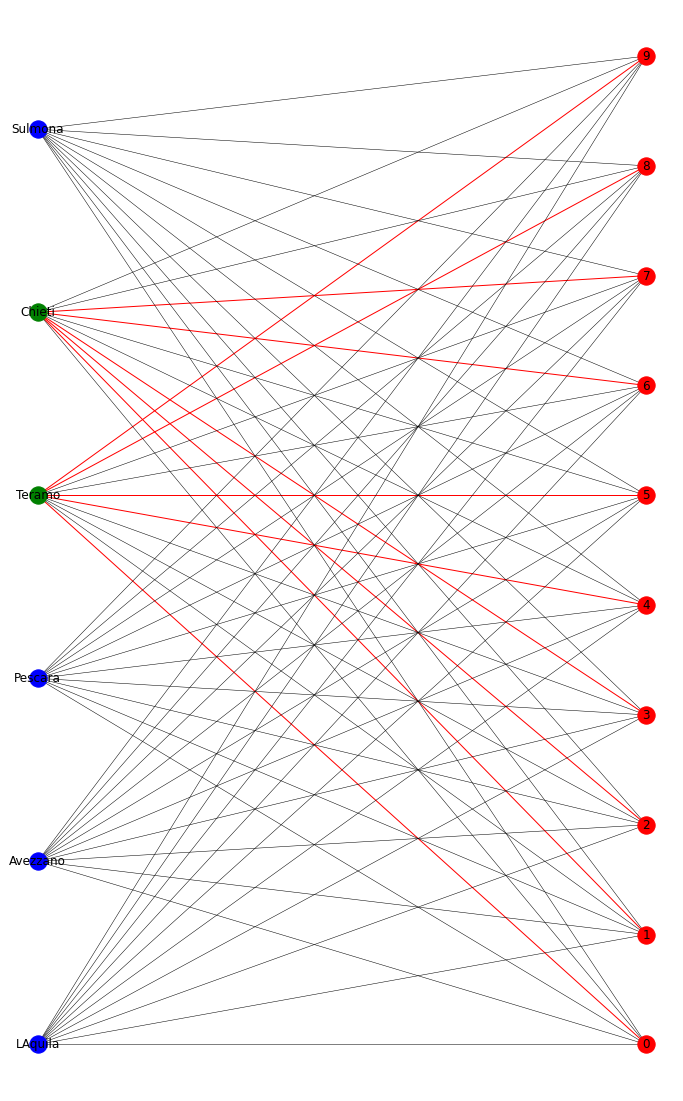

In [23]:
%matplotlib inline


plt.figure(figsize=(12,20))

pos = {}

# cosi le posizioni le scegliamo noi, ma nel 'set-cover.ipynb' vediamo come farlo fare a networkX
for ind,u in enumerate(Facilities):
    pos[u] = (0.0, 30.0/len(Facilities) * ind)

for ind,u in enumerate(Clients):
    pos[u] = (20.0, 30.0/len(Clients) * ind)
    
    

activated_edge = [(i,j) for i,j in G.edges() if x[i,j].x > 1E-6]
not_activated_edge = [(i,j) for i,j in G.edges() if x[i,j].x <= 1E-6]

nx.draw_networkx_edges (G, pos, edgelist=activated_edge, edge_color='r')
nx.draw_networkx_edges (G, pos, edgelist=not_activated_edge, edge_color='black', width=0.5)
#nx.draw_networkx_edge_labels (G, pos, edge_labels=Costs)

nodelab = {i:i for i in G.nodes()}

print(nodelab)

active_plants = [j for j in Facilities if y[j].x > 0.5]
not_active_plants = [j for j in Facilities if y[j].x < 0.5]

nx.draw_networkx_nodes(G,pos, nodelist=active_plants, node_color='g')
nx.draw_networkx_nodes(G, pos, nodelist=not_active_plants, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=[u for u in Clients], node_color ='r')

nx.draw_networkx_labels (G,pos, labels=nodelab)

nx.draw(G, pos, alpha=0.0, node_color ='b', node_size=500)
